In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from datetime import datetime

In [124]:
data=pd.read_csv("blinkit_customer_feedback.csv")

In [125]:
df1=pd.DataFrame(data)

In [126]:
df1.isna().sum()

feedback_id          0
order_id             0
customer_id          0
rating               0
feedback_text        0
feedback_category    0
sentiment            0
feedback_date        0
dtype: int64

In [127]:
df1.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date'],
      dtype='object')

In [128]:
df1[df1.duplicated()]

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date


In [129]:
data2=pd.read_csv("blinkit_orders.csv")

In [130]:
df2=pd.DataFrame(data2)

In [131]:
df2.count()

order_id                  5000
customer_id               5000
order_date                5000
promised_delivery_time    5000
actual_delivery_time      5000
delivery_status           5000
order_total               5000
payment_method            5000
delivery_partner_id       5000
store_id                  5000
dtype: int64

In [132]:
df2.isna().sum()

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64

In [133]:
df2[df2.duplicated()]

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id


In [134]:
df1["rating"].mean()

3.3444

In [135]:
df1["rating"].median()

4.0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29800\3416133946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df1["rating"])


<Axes: xlabel='rating', ylabel='Density'>

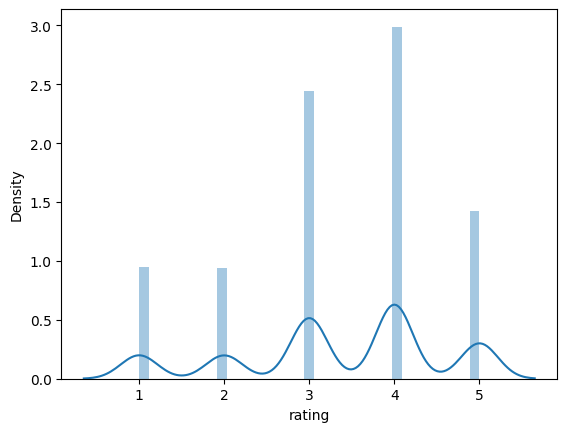

In [136]:
sn.distplot(df1["rating"])

In [137]:
a = df1.feedback_id.count()

In [138]:
df1.groupby("sentiment")["customer_id"].count()

sentiment
Negative    1642
Neutral     1738
Positive    1620
Name: customer_id, dtype: int64

In [139]:
merged_df = df1.merge(df2, on='order_id', how='left')

In [140]:
df3 = merged_df[merged_df["sentiment"]=="Negative"]

In [141]:
merged_df.groupby("sentiment")["order_total"].mean()

sentiment
Negative    2210.431425
Neutral     2208.048337
Positive    2186.538327
Name: order_total, dtype: float64

In [142]:
df3.head()

,feedback_id,order_id,customer_id_x,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741
5,4089724,3265154092,43367112,2,Product was damaged during delivery.,Customer Service,Negative,2023-03-18,43367112,2023-03-18 16:29:51,2023-03-18 16:49:51,2023-03-18 16:48:51,On Time,3161.43,UPI,554,3442
7,2259308,6568151549,88866835,2,I had a bad experience.,App Experience,Negative,2024-03-31,88866835,2024-03-31 06:26:48,2024-03-31 06:37:48,2024-03-31 06:39:48,On Time,905.47,Cash,67714,115
8,7380970,6006693867,24496983,3,Product was damaged during delivery.,Delivery,Negative,2023-07-14,24496983,2023-07-13 23:49:36,2023-07-14 00:02:36,2023-07-14 00:05:36,On Time,1371.17,Card,91362,9021


<Axes: ylabel='order_total'>

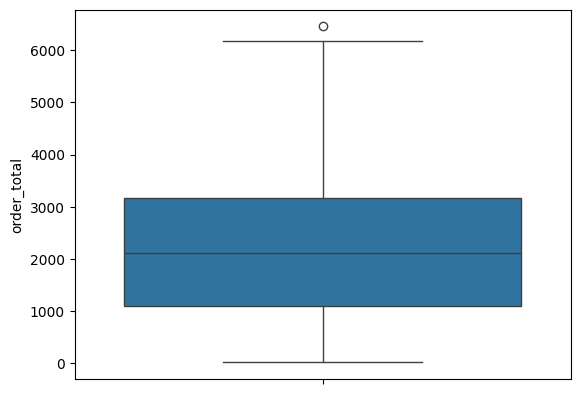

In [143]:
sn.boxplot(df3["order_total"])

<Axes: ylabel='order_total'>

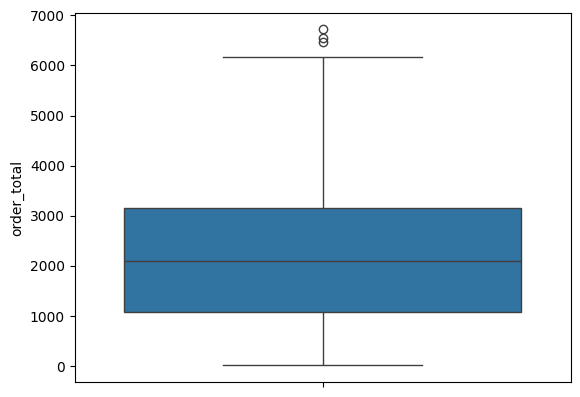

In [144]:
sn.boxplot(merged_df["order_total"])

<Axes: ylabel='order_total'>

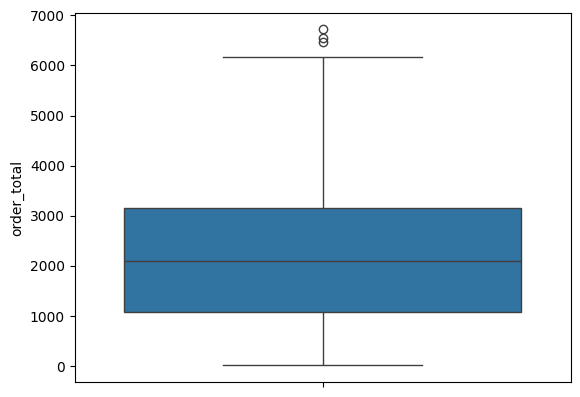

In [145]:
sn.boxplot(df2["order_total"])

In [146]:
df4= merged_df[merged_df["sentiment"]=="Positive"]

In [147]:
df4.head()

,feedback_id,order_id,customer_id_x,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
6,230696,4898355547,13284996,4,Highly recommended!,Product Quality,Positive,2023-04-16,13284996,2023-04-16 18:50:37,2023-04-16 19:01:37,2023-04-16 19:02:37,On Time,956.40,Card,14630,1318
13,3158837,5504941865,76512976,5,Highly recommended!,App Experience,Positive,2024-01-28,76512976,2024-01-28 02:39:11,2024-01-28 02:55:11,2024-01-28 03:06:11,Slightly Delayed,2287.68,Wallet,56077,9809
15,8111644,2137046916,12059049,4,"Overall good experience, thank you!",Customer Service,Positive,2024-02-03,12059049,2024-02-03 08:50:32,2024-02-03 09:03:32,2024-02-03 09:01:32,On Time,3373.96,UPI,12377,1007
22,1592958,2268306684,66742602,5,"Overall good experience, thank you!",Delivery,Positive,2024-05-28,66742602,2024-05-28 14:59:08,2024-05-28 15:11:08,2024-05-28 15:10:08,On Time,2991.57,Wallet,65733,6847
32,4382390,8395583761,1989720,4,Great prices and fast delivery!,App Experience,Positive,2024-08-04,1989720,2024-08-04 23:35:44,2024-08-04 23:53:44,2024-08-04 23:48:44,On Time,410.62,UPI,84816,5448


In [148]:
merged_df.head()

,feedback_id,order_id,customer_id_x,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [149]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
merged_df['sentiment_numeric'] = merged_df['sentiment'].map(sentiment_mapping)

In [150]:
merged_df["sentiment_numeric"].corr(merged_df["order_total"])

-0.007392104003471859

In [151]:
merged_df

,feedback_id,order_id,customer_id_x,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,sentiment_numeric
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,0
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,-1
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,0
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,0
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9024060,1669690997,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,Cash,90914,1587,-1
4996,4715968,8340761903,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,Cash,27952,3458,0
4997,9621021,5936301790,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,Cash,9590,7424,0
4998,1134095,5710579377,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,UPI,29940,6128,0


In [152]:
negative_reviews = df1[df1['sentiment'] == 'Negative']

In [153]:
negative_reviews.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
5,4089724,3265154092,43367112,2,Product was damaged during delivery.,Customer Service,Negative,2023-03-18
7,2259308,6568151549,88866835,2,I had a bad experience.,App Experience,Negative,2024-03-31
8,7380970,6006693867,24496983,3,Product was damaged during delivery.,Delivery,Negative,2023-07-14


In [154]:
negative_reviews['feedback_date'] = pd.to_datetime(negative_reviews['feedback_date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29800\3132787204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['feedback_date'] = pd.to_datetime(negative_reviews['feedback_date'])


In [155]:
negative_reviews_sorted = negative_reviews.sort_values(by=['customer_id', 'feedback_date'])

In [156]:
n_review= negative_reviews_sorted.groupby('customer_id').first().reset_index()

In [157]:
n_review.count()[0]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29800\1906131229.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_review.count()[0]


1206

In [158]:
n_review.head()

,customer_id,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25


In [159]:
main_df = n_review.merge(df2, on='order_id', how='left')

In [160]:
main_df.head()

,customer_id_x,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11,31813,2024-07-11 03:32:42,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517,1071
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19,119099,2024-04-19 13:46:57,2024-04-19 14:06:57,2024-04-19 14:06:57,On Time,5122.10,UPI,6246,3096
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19,188838,2024-02-19 14:40:22,2024-02-19 14:52:22,2024-02-19 14:59:22,Slightly Delayed,1116.88,UPI,1443,9970
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24,191616,2024-05-24 07:26:24,2024-05-24 07:45:24,2024-05-24 07:59:24,Slightly Delayed,2425.95,Cash,91946,7821
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25,211163,2023-11-25 12:03:51,2023-11-25 12:19:51,2023-11-25 12:37:51,Significantly Delayed,3567.36,UPI,32614,3514


In [161]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id_x           1206 non-null   int64         
 1   feedback_id             1206 non-null   int64         
 2   order_id                1206 non-null   int64         
 3   rating                  1206 non-null   int64         
 4   feedback_text           1206 non-null   object        
 5   feedback_category       1206 non-null   object        
 6   sentiment               1206 non-null   object        
 7   feedback_date           1206 non-null   datetime64[ns]
 8   customer_id_y           1206 non-null   int64         
 9   order_date              1206 non-null   object        
 10  promised_delivery_time  1206 non-null   object        
 11  actual_delivery_time    1206 non-null   object        
 12  delivery_status         1206 non-null   object  

In [162]:
main_df.head()

,customer_id_x,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11,31813,2024-07-11 03:32:42,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517,1071
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19,119099,2024-04-19 13:46:57,2024-04-19 14:06:57,2024-04-19 14:06:57,On Time,5122.10,UPI,6246,3096
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19,188838,2024-02-19 14:40:22,2024-02-19 14:52:22,2024-02-19 14:59:22,Slightly Delayed,1116.88,UPI,1443,9970
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24,191616,2024-05-24 07:26:24,2024-05-24 07:45:24,2024-05-24 07:59:24,Slightly Delayed,2425.95,Cash,91946,7821
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25,211163,2023-11-25 12:03:51,2023-11-25 12:19:51,2023-11-25 12:37:51,Significantly Delayed,3567.36,UPI,32614,3514


In [163]:
main_df["order_date"] = pd.to_datetime(main_df["order_date"]).dt.strftime('%Y-%m-%d')

In [164]:
main_df.head()

,customer_id_x,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11,31813,2024-07-11,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517,1071
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19,119099,2024-04-19,2024-04-19 14:06:57,2024-04-19 14:06:57,On Time,5122.10,UPI,6246,3096
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19,188838,2024-02-19,2024-02-19 14:52:22,2024-02-19 14:59:22,Slightly Delayed,1116.88,UPI,1443,9970
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24,191616,2024-05-24,2024-05-24 07:45:24,2024-05-24 07:59:24,Slightly Delayed,2425.95,Cash,91946,7821
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25,211163,2023-11-25,2023-11-25 12:19:51,2023-11-25 12:37:51,Significantly Delayed,3567.36,UPI,32614,3514


In [165]:
main_df["Period"] = np.where(main_df["order_date"] < main_df["feedback_date"], "Backward",
    np.where(main_df["order_date"] > main_df["feedback_date"],"Forward","Same"))

In [166]:
main_df.head()

,customer_id_x,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,Period
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11,31813,2024-07-11,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517,1071,Same
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19,119099,2024-04-19,2024-04-19 14:06:57,2024-04-19 14:06:57,On Time,5122.10,UPI,6246,3096,Same
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19,188838,2024-02-19,2024-02-19 14:52:22,2024-02-19 14:59:22,Slightly Delayed,1116.88,UPI,1443,9970,Same
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24,191616,2024-05-24,2024-05-24 07:45:24,2024-05-24 07:59:24,Slightly Delayed,2425.95,Cash,91946,7821,Same
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25,211163,2023-11-25,2023-11-25 12:19:51,2023-11-25 12:37:51,Significantly Delayed,3567.36,UPI,32614,3514,Same


In [167]:
main_df.groupby("Period")["Period"].count()

Period
Backward      15
Same        1191
Name: Period, dtype: int64

In [168]:
main_df.to_csv("Blinkit_master_data.csv")

In [169]:
master_data=pd.read_excel("Blinkit Master Dataset.xlsx")

In [170]:
master_data=pd.DataFrame(master_data)

In [171]:
master_data.head()

,customer_id_x,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,order_d,Period
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11,31813,2024-07-11,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517,1071,2024-07-11 03:32:42,Same
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19,119099,2024-04-18,2024-04-19 14:06:57,2024-04-19 14:06:57,On Time,5122.10,UPI,6246,3096,2024-04-19 13:46:57,Backward
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19,188838,2024-02-21,2024-02-19 14:52:22,2024-02-19 14:59:22,Slightly Delayed,1116.88,UPI,1443,9970,2024-02-19 14:40:22,Forward
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24,191616,2024-05-23,2024-05-24 07:45:24,2024-05-24 07:59:24,Slightly Delayed,2425.95,Cash,91946,7821,2024-05-24 07:26:24,Backward
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25,211163,2023-11-25,2023-11-25 12:19:51,2023-11-25 12:37:51,Significantly Delayed,3567.36,UPI,32614,3514,2023-11-25 12:03:51,Same


In [172]:
master_data.groupby("Period")["Period"].count()

Period
Backward    414
Forward     532
Same        260
Name: Period, dtype: int64

In [173]:
master_data["Days_gap"] = (master_data["order_date"] - master_data["feedback_date"]).dt.days.abs()

In [174]:
master_data.head()

,customer_id_x,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,order_d,Period,Days_gap
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11,31813,2024-07-11,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517,1071,2024-07-11 03:32:42,Same,0
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19,119099,2024-04-18,2024-04-19 14:06:57,2024-04-19 14:06:57,On Time,5122.10,UPI,6246,3096,2024-04-19 13:46:57,Backward,1
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19,188838,2024-02-21,2024-02-19 14:52:22,2024-02-19 14:59:22,Slightly Delayed,1116.88,UPI,1443,9970,2024-02-19 14:40:22,Forward,2
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24,191616,2024-05-23,2024-05-24 07:45:24,2024-05-24 07:59:24,Slightly Delayed,2425.95,Cash,91946,7821,2024-05-24 07:26:24,Backward,1
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25,211163,2023-11-25,2023-11-25 12:19:51,2023-11-25 12:37:51,Significantly Delayed,3567.36,UPI,32614,3514,2023-11-25 12:03:51,Same,0


In [175]:
master_data=master_data[master_data["Days_gap"]<=30]

In [176]:
master_data.head()

,customer_id_x,feedback_id,order_id,rating,feedback_text,feedback_category,sentiment,feedback_date,customer_id_y,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,order_d,Period,Days_gap
0,31813,7669412,7997347191,3,Product was damaged during delivery.,App Experience,Negative,2024-07-11,31813,2024-07-11,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517,1071,2024-07-11 03:32:42,Same,0
1,119099,9132205,6538760883,3,The order was incorrect.,App Experience,Negative,2024-04-19,119099,2024-04-18,2024-04-19 14:06:57,2024-04-19 14:06:57,On Time,5122.10,UPI,6246,3096,2024-04-19 13:46:57,Backward,1
2,188838,5156321,1282422181,3,Very disappointed with the quality.,App Experience,Negative,2024-02-19,188838,2024-02-21,2024-02-19 14:52:22,2024-02-19 14:59:22,Slightly Delayed,1116.88,UPI,1443,9970,2024-02-19 14:40:22,Forward,2
3,191616,415485,9989636336,3,Delivery was late and I was unhappy.,Product Quality,Negative,2024-05-24,191616,2024-05-23,2024-05-24 07:45:24,2024-05-24 07:59:24,Slightly Delayed,2425.95,Cash,91946,7821,2024-05-24 07:26:24,Backward,1
4,211163,7305285,4056304110,3,Very disappointed with the quality.,Product Quality,Negative,2023-11-25,211163,2023-11-25,2023-11-25 12:19:51,2023-11-25 12:37:51,Significantly Delayed,3567.36,UPI,32614,3514,2023-11-25 12:03:51,Same,0


In [177]:
pivot_master_df=master_data.pivot(index=['customer_id_x','feedback_id','order_id','rating','delivery_status','payment_method','delivery_partner_id',
                                         'store_id'],columns='Period',values='order_total')

In [178]:
pivot_master_df.to_csv("Pivoted_master_df.csv")

In [179]:
pivot_master_df=pd.read_csv("Pivoted_master_df.csv")

In [180]:
pivot_backward = pivot_master_df.groupby("customer_id_x")["Backward"].mean()

In [181]:
pivot_backward = pd.DataFrame(pivot_backward)

In [182]:
pivot_backward.head()

,Backward
customer_id_x,
31813,NaN
119099,5122.10
188838,NaN
191616,2425.95
211163,NaN


In [183]:
pivot_forward = pivot_master_df.groupby("customer_id_x")["Forward"].mean()

In [184]:
pivot_forward = pd.DataFrame(pivot_forward)

In [185]:
pivot_forward.head()

,Forward
customer_id_x,
31813,NaN
119099,NaN
188838,1116.88
191616,NaN
211163,NaN


In [186]:
pivot_forward.count()[0]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29800\1651225281.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pivot_forward.count()[0]


532

In [187]:
pivot_backward.count()[0]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29800\1209943529.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pivot_backward.count()[0]


414

In [188]:
F_customer=pd.read_excel("CustomerID.xlsx")

In [189]:
F_customer.head()

,customer_id_x
0,31813
1,119099
2,188838
3,191616
4,211163


In [190]:
F_customer = F_customer.merge(pivot_forward, on='customer_id_x', how='left')

In [191]:
F_customer = F_customer.merge(pivot_backward, on='customer_id_x', how='left')

In [205]:
F_customer.fillna(0,inplace=True)

In [206]:
F_customer

,customer_id_x,Forward,Backward
0,31813,0.00,0.00
1,119099,0.00,5122.10
2,188838,1116.88,0.00
3,191616,0.00,2425.95
4,211163,0.00,0.00
...,...,...,...
698,59643062,0.00,0.00
699,59840071,0.00,908.37
700,59890331,3818.33,0.00
701,60062501,0.00,0.00


In [204]:
F_customer.to_csv("customer_feedback_analysis.csv")

PermissionError: [Errno 13] Permission denied: 'customer_feedback_analysis.csv'

In [213]:
sn.boxplot([F_customer["Forward"])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2526534878.py, line 1)

<Axes: ylabel='Backward'>

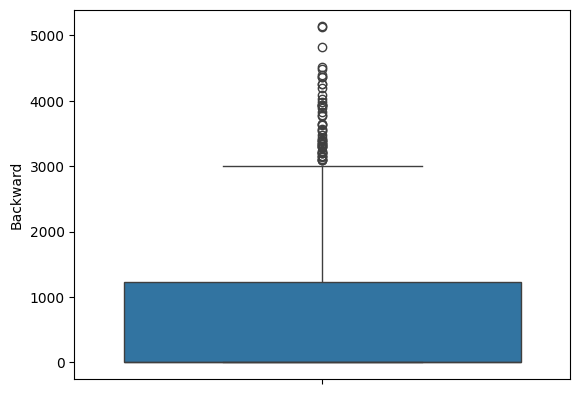

In [212]:
sn.boxplot(F_customer["Backward"])

In [214]:
F_customer.describe()

,customer_id_x,Forward,Backward
count,7.030000e+02,703.000000,703.000000
mean,2.929689e+07,868.957212,735.118905
std,1.745128e+07,1345.537424,1205.822981
min,3.181300e+04,0.000000,0.000000
25%,1.353792e+07,0.000000,0.000000
50%,2.956207e+07,0.000000,0.000000
75%,4.451765e+07,1417.290000,1235.385000
max,6.030026e+07,5604.640000,5136.720000


In [197]:
from scipy.stats import ttest_rel

In [198]:
test = F_customer.dropna(subset=['Backward', 'Forward'])


In [199]:
t_stat, p_value = ttest_rel(F_customer['Backward'], F_customer['Forward'])

In [200]:
p_value

nan

In [201]:
F_customer

,customer_id_x,Forward,Backward
0,31813,NaN,NaN
1,119099,NaN,5122.10
2,188838,1116.88,NaN
3,191616,NaN,2425.95
4,211163,NaN,NaN
...,...,...,...
698,59643062,NaN,NaN
699,59840071,NaN,908.37
700,59890331,3818.33,NaN
701,60062501,NaN,NaN


In [203]:
F_customers

,customer_id_x,Forward,Backward
0,31813,NaN,NaN
1,119099,NaN,5122.10
2,188838,1116.88,NaN
3,191616,NaN,2425.95
4,211163,NaN,NaN
...,...,...,...
698,59643062,NaN,NaN
699,59840071,NaN,908.37
700,59890331,3818.33,NaN
701,60062501,NaN,NaN
